# Libraries 

In [1]:
# trio!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Import Train/Test Set

This time we use sampling to reduce training time.

In [2]:
df_train = pd.read_csv('train.csv').sample(10000, random_state=2021)
df_test = pd.read_csv('test.csv').sample(3000, random_state=2021)

In [3]:
features_list = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q']
target = 'stator_yoke'

In [4]:
X_train = df_train[features_list].to_numpy()
y_train = df_train[target].to_numpy()

In [5]:
X_train.shape, y_train.shape

((10000, 7), (10000,))

In [6]:
X_test = df_test[features_list].to_numpy()
y_test = df_test[target].to_numpy()

In [7]:
X_test.shape, y_test.shape

((3000, 7), (3000,))

# Data Preprocessing

In [8]:
X_scaler = MinMaxScaler()

In [9]:
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#  Predictive Models

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
def plot_test(reg, X, y):
    y_pred = reg.predict(X)
    plt.scatter(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f'RMSE: {rmse}')

## Ridge 

In [12]:
from sklearn.linear_model import Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [13]:
param_grid_ridge = {
    "alpha": [0.01, 0.2, 0.4, 0.6, 0.8, 1],
    "solver": ["cholesky", "saga"]
}

In [14]:
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, n_jobs=-1)

In [15]:
grid_search_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.2, 0.4, 0.6, 0.8, 1],
                         'solver': ['cholesky', 'saga']})

In [16]:
grid_search_ridge.best_params_

{'alpha': 0.4, 'solver': 'saga'}

In [17]:
grid_search_ridge.cv_results_

{'mean_fit_time': array([0.00250793, 0.01520042, 0.00219908, 0.0145092 , 0.00229959,
        0.01279955, 0.00229969, 0.01410007, 0.00230002, 0.01289983,
        0.00210061, 0.01059976]),
 'std_fit_time': array([0.00056187, 0.00224909, 0.00067767, 0.00167655, 0.00040021,
        0.00180585, 0.00024462, 0.00241669, 0.00040072, 0.0011575 ,
        0.0002002 , 0.00124105]),
 'mean_score_time': array([0.00039229, 0.00069966, 0.00020003, 0.00059061, 0.00030031,
        0.00070076, 0.00040064, 0.00109992, 0.0004005 , 0.00050039,
        0.00049958, 0.0004003 ]),
 'std_score_time': array([1.96757053e-04, 2.45262369e-04, 2.44989725e-04, 1.82727545e-04,
        2.45203957e-04, 2.44854158e-04, 2.00320794e-04, 2.00821745e-04,
        2.00248354e-04, 2.78041453e-07, 5.47334632e-04, 2.00152816e-04]),
 'param_alpha': masked_array(data=[0.01, 0.01, 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1,
                    1],
              mask=[False, False, False, False, False, False, False, False,
            

In [18]:
df_grid_search_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
df_grid_search_ridge.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002508,0.000562,0.000392,0.000197,0.01,cholesky,"{'alpha': 0.01, 'solver': 'cholesky'}",0.842593,0.845733,0.832234,0.849496,0.850215,0.844054,0.006515,5
1,0.015200,0.002249,0.000700,0.000245,0.01,saga,"{'alpha': 0.01, 'solver': 'saga'}",0.842595,0.845733,0.832237,0.849495,0.850212,0.844054,0.006513,6
2,0.002199,0.000678,0.000200,0.000245,0.2,cholesky,"{'alpha': 0.2, 'solver': 'cholesky'}",0.842599,0.845727,0.832237,0.849499,0.850211,0.844055,0.006513,3
3,0.014509,0.001677,0.000591,0.000183,0.2,saga,"{'alpha': 0.2, 'solver': 'saga'}",0.842592,0.845728,0.832238,0.849499,0.850211,0.844053,0.006513,8
4,0.002300,0.000400,0.000300,0.000245,0.4,cholesky,"{'alpha': 0.4, 'solver': 'cholesky'}",0.842604,0.845720,0.832239,0.849503,0.850207,0.844055,0.006512,4


In [19]:
df_grid_search_ridge.sort_values(["param_solver", "param_alpha", "mean_test_score"], inplace=True)

<AxesSubplot:xlabel='param_alpha', ylabel='mean_test_score'>

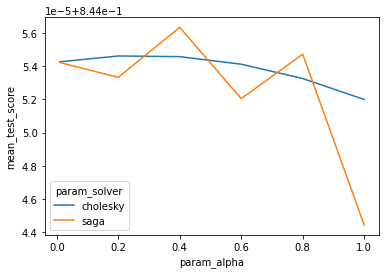

In [20]:
sns.lineplot(x="param_alpha", y="mean_test_score", hue="param_solver", data=df_grid_search_ridge)

In [21]:
grid_search_ridge.score(X_test_scaled, y_test)

0.8329175523456336

RMSE: 0.38648408395254913


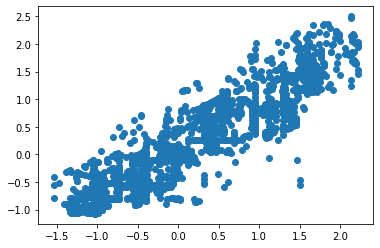

In [22]:
plot_test(grid_search_ridge, X_test_scaled, y_test)

## Lasso

In [23]:
from sklearn.linear_model import Lasso

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [24]:
param_grid_lasso = {
    "alpha": [0.01, 0.2, 0.4, 0.6, 0.8, 1]
}

In [25]:
grid_search_lasso = GridSearchCV(Lasso(), param_grid=param_grid_lasso, cv=5, n_jobs=-1)

In [26]:
grid_search_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.2, 0.4, 0.6, 0.8, 1]})

In [27]:
grid_search_lasso.best_params_

{'alpha': 0.01}

In [28]:
grid_search_lasso.cv_results_

{'mean_fit_time': array([0.00169187, 0.0021018 , 0.0020998 , 0.00209956, 0.001998  ,
        0.00189958]),
 'std_fit_time': array([0.00023454, 0.00019961, 0.00020025, 0.00020061, 0.00031637,
        0.00019937]),
 'mean_score_time': array([0.00030785, 0.00029879, 0.00029988, 0.00030022, 0.00050411,
        0.00049982]),
 'std_score_time': array([2.51876310e-04, 2.43962603e-04, 2.44854019e-04, 2.45126368e-04,
        3.63648910e-06, 9.12243198e-07]),
 'param_alpha': masked_array(data=[0.01, 0.2, 0.4, 0.6, 0.8, 1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01},
  {'alpha': 0.2},
  {'alpha': 0.4},
  {'alpha': 0.6},
  {'alpha': 0.8},
  {'alpha': 1}],
 'split0_test_score': array([ 8.31758611e-01,  1.99375939e-01, -1.58310342e-05, -1.58310342e-05,
        -1.58310342e-05, -1.58310342e-05]),
 'split1_test_score': array([ 0.83686056,  0.20393506, -0.00144456, -0.00144456, -0.00144456,
        -0.00

In [29]:
df_grid_search_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
df_grid_search_lasso.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001692,0.000235,0.000308,0.000252,0.01,{'alpha': 0.01},0.831759,0.836861,0.825038,0.843773,0.845184,0.836523,0.007514,1
1,0.002102,0.000200,0.000299,0.000244,0.2,{'alpha': 0.2},0.199376,0.203935,0.213555,0.207348,0.203508,0.205544,0.004737,2
2,0.002100,0.000200,0.000300,0.000245,0.4,{'alpha': 0.4},-0.000016,-0.001445,-0.001739,-0.000004,-0.000001,-0.000641,0.000782,3
3,0.002100,0.000201,0.000300,0.000245,0.6,{'alpha': 0.6},-0.000016,-0.001445,-0.001739,-0.000004,-0.000001,-0.000641,0.000782,3
4,0.001998,0.000316,0.000504,0.000004,0.8,{'alpha': 0.8},-0.000016,-0.001445,-0.001739,-0.000004,-0.000001,-0.000641,0.000782,3


In [30]:
df_grid_search_lasso.sort_values(["param_alpha", "mean_test_score"], inplace=True)

<AxesSubplot:xlabel='param_alpha', ylabel='mean_test_score'>

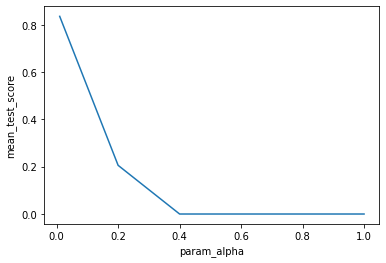

In [31]:
sns.lineplot(x="param_alpha", y="mean_test_score", data=df_grid_search_lasso)

In [32]:
grid_search_lasso.score(X_test_scaled, y_test)

0.8262217629318773

RMSE: 0.3941521436079015


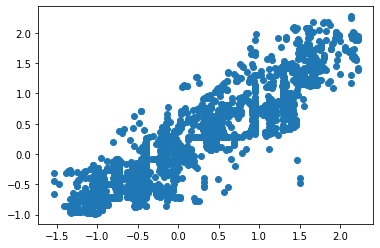

In [33]:
plot_test(grid_search_lasso, X_test_scaled, y_test)

## Decision Tree Regressor 

In [34]:
from sklearn.tree import DecisionTreeRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [35]:
param_grid_dt_reg = {
    "max_depth": [5, 7, 10, 15, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 10, 20],
}

In [36]:
grid_search_dt_reg = GridSearchCV(DecisionTreeRegressor(), param_grid_dt_reg, cv=5, n_jobs=-1)

In [37]:
grid_search_dt_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15, 30],
                         'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [2, 5, 10]})

In [38]:
grid_search_dt_reg.best_params_

{'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [39]:
grid_search_dt_reg.cv_results_

{'mean_fit_time': array([0.02379861, 0.02319918, 0.0240994 , 0.02599969, 0.02319951,
        0.02429924, 0.03200016, 0.02239943, 0.02579966, 0.03439889,
        0.03479881, 0.03339958, 0.03180008, 0.03119988, 0.03059921,
        0.03139935, 0.03089943, 0.03019953, 0.04309978, 0.0434001 ,
        0.04290023, 0.0407999 , 0.03909965, 0.03829942, 0.03719983,
        0.03690014, 0.03799963, 0.05579991, 0.05281496, 0.05069981,
        0.04760103, 0.04630008, 0.04850039, 0.03899879, 0.03679962,
        0.03799939, 0.06429954, 0.05849934, 0.0671999 , 0.05469904,
        0.04330001, 0.04350038, 0.03809924, 0.03589897, 0.03489819]),
 'std_fit_time': array([0.00107699, 0.00051   , 0.00159397, 0.0037812 , 0.00074834,
        0.00203985, 0.01043045, 0.00037442, 0.00271337, 0.00831493,
        0.006486  , 0.00396737, 0.00067832, 0.00261848, 0.00086062,
        0.00198504, 0.00179942, 0.00196448, 0.00135709, 0.00174366,
        0.00231052, 0.00402019, 0.00208349, 0.000927  , 0.00097999,
        0.002

In [40]:
df_grid_search_dt_reg = pd.DataFrame(grid_search_dt_reg.cv_results_)
df_grid_search_dt_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023799,0.001077,0.000801,0.000400,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.865384,0.859384,0.850290,0.862312,0.869908,0.861456,0.006581,40
1,0.023199,0.000510,0.000700,0.000245,5,1,5,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.865384,0.859384,0.850290,0.862312,0.869908,0.861456,0.006581,40
2,0.024099,0.001594,0.000700,0.000245,5,1,10,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.865384,0.859384,0.850290,0.862312,0.869908,0.861456,0.006581,40
3,0.026000,0.003781,0.000643,0.000197,5,10,2,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.864616,0.859098,0.849729,0.866938,0.869986,0.862074,0.007127,37
4,0.023200,0.000748,0.000600,0.000200,5,10,5,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.864616,0.859098,0.849729,0.866938,0.869986,0.862074,0.007127,37


In [41]:
df_grid_search_dt_reg.sort_values(["param_max_depth", "param_min_samples_leaf", "param_min_samples_split", "mean_test_score"], inplace=True)

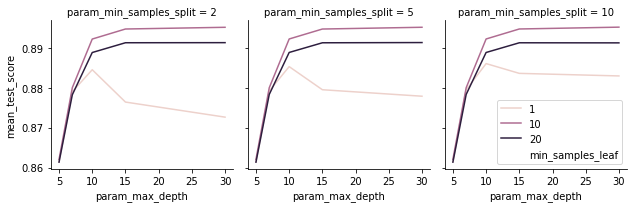

In [42]:
fig_dt_reg = sns.FacetGrid(df_grid_search_dt_reg, col="param_min_samples_split")
fig_dt_reg.map(sns.lineplot, "param_max_depth", "mean_test_score", "param_min_samples_leaf")
plt.plot([], [], ' ', label="min_samples_leaf")
plt.legend()
plt.show()

In [43]:
grid_search_dt_reg.score(X_test, y_test)

0.6621693386890183

RMSE: 0.5495607795922133


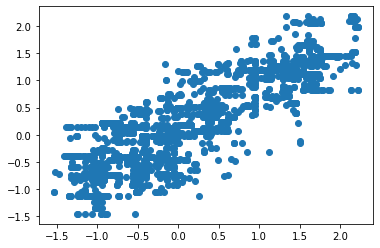

In [44]:
plot_test(grid_search_dt_reg, X_test, y_test)

## Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
param_grid_rf_reg = {
    "max_depth": [5, 7, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 10, 20],
}

In [47]:
grid_search_rf_reg = GridSearchCV(RandomForestRegressor(), param_grid_rf_reg, cv=5, n_jobs=-1)

In [48]:
grid_search_rf_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 20],
                         'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [2, 5, 10]})

In [49]:
grid_search_rf_reg.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [50]:
grid_search_rf_reg.cv_results_

{'mean_fit_time': array([1.56729832, 1.58319926, 1.51469922, 1.52878966, 1.63950005,
        1.52539892, 1.5704998 , 1.51379857, 1.50060024, 1.97979937,
        1.96760006, 2.00519924, 1.93680058, 1.96539912, 1.98250012,
        1.97219944, 1.95029783, 1.99069915, 2.54719787, 2.59419513,
        2.58859911, 2.40370436, 2.56869931, 2.51759377, 2.3282968 ,
        2.24329276, 2.3964992 , 3.89660006, 3.66949973, 3.32549834,
        2.59199877, 2.63349986, 2.62089934, 2.39989915, 2.12679954,
        2.03699937]),
 'std_fit_time': array([0.06136196, 0.07267566, 0.02327854, 0.02728947, 0.07887156,
        0.02412532, 0.05046313, 0.06157458, 0.02087181, 0.05303648,
        0.04402855, 0.05649146, 0.04388445, 0.05223439, 0.05495888,
        0.05234863, 0.03411893, 0.07204597, 0.01265495, 0.06419066,
        0.05981787, 0.04505006, 0.1107034 , 0.06987988, 0.09585077,
        0.07242908, 0.15239213, 0.09977615, 0.10120125, 0.1250896 ,
        0.05279691, 0.05167487, 0.04595602, 0.07397884, 0.050

In [51]:
df_grid_search_rf_reg = pd.DataFrame(grid_search_rf_reg.cv_results_)
df_grid_search_rf_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.567298,0.061362,0.014100,0.000583,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.874454,0.871233,0.861537,0.878571,0.878569,0.872873,0.006302,32
1,1.583199,0.072676,0.019100,0.009265,5,1,5,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.873522,0.871176,0.862096,0.879024,0.878574,0.872878,0.006161,31
2,1.514699,0.023279,0.014101,0.000860,5,1,10,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.874060,0.870764,0.862947,0.878824,0.878831,0.873085,0.005917,29
3,1.528790,0.027289,0.015401,0.002035,5,10,2,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.874606,0.871044,0.862741,0.879126,0.878179,0.873139,0.005931,28
4,1.639500,0.078872,0.014799,0.000927,5,10,5,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.874251,0.871284,0.861391,0.878906,0.878062,0.872779,0.006317,35


In [52]:
df_grid_search_rf_reg.sort_values(["param_max_depth", "param_min_samples_leaf", "param_min_samples_split", "mean_test_score"], inplace=True)

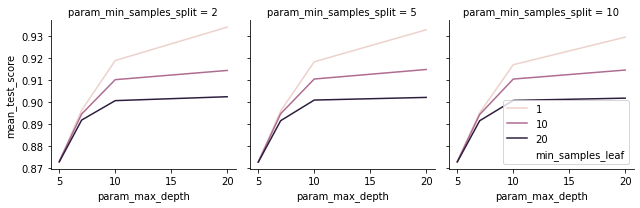

In [53]:
fig_rf_reg = sns.FacetGrid(df_grid_search_rf_reg, col="param_min_samples_split")
fig_rf_reg.map(sns.lineplot, "param_max_depth", "mean_test_score", "param_min_samples_leaf")
plt.plot([], [], ' ', label="min_samples_leaf")
plt.legend()
plt.show()

In [54]:
grid_search_rf_reg.score(X_test, y_test)

0.7702887034305035

RMSE: 0.45316606003615173


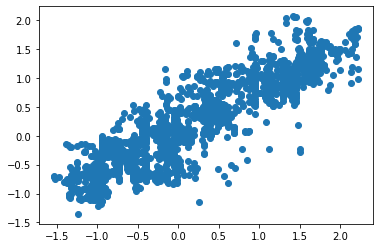

In [55]:
plot_test(grid_search_rf_reg, X_test, y_test)

## AdaBoost Regressor

In [56]:
from sklearn.ensemble import AdaBoostRegressor

In [57]:
param_grid_adb_reg = {
    'n_estimators': [50, 100],
    'learning_rate' : [0.01, 0.2, 0.5, 1],
    'loss' : ['linear', 'square', 'exponential']
 }

In [58]:
grid_search_adb_reg = GridSearchCV(AdaBoostRegressor(), param_grid_adb_reg, cv=5, n_jobs=-1)

In [59]:
grid_search_adb_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.2, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]})

In [60]:
grid_search_adb_reg.best_params_

{'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 50}

In [61]:
grid_search_adb_reg.cv_results_

{'mean_fit_time': array([0.87789922, 1.70169969, 0.85970073, 1.7395997 , 0.87369933,
        1.66699991, 0.82379532, 1.44029965, 0.71770549, 1.19209471,
        0.81329923, 1.47320046, 0.66699982, 0.94879384, 0.63309994,
        0.91659908, 0.65009823, 1.12919898, 0.42059565, 0.64750009,
        0.52539115, 0.81595268, 0.58184757, 0.75279932]),
 'std_fit_time': array([0.05652095, 0.05058666, 0.05884291, 0.08165819, 0.06260767,
        0.02861343, 0.07353784, 0.06469103, 0.02081541, 0.01140554,
        0.03192301, 0.05296513, 0.02082301, 0.17439009, 0.04634447,
        0.00596935, 0.01074486, 0.01811023, 0.08411703, 0.2406035 ,
        0.02825071, 0.01637011, 0.01511635, 0.05307291]),
 'mean_score_time': array([0.01049972, 0.02010016, 0.01059866, 0.01959996, 0.00989938,
        0.02120047, 0.0150001 , 0.02830052, 0.01169419, 0.02200079,
        0.0117002 , 0.02289896, 0.01150036, 0.01760721, 0.01129913,
        0.0217001 , 0.01139975, 0.02620869, 0.00830488, 0.0141995 ,
        0.015200

In [62]:
df_grid_search_adb_reg = pd.DataFrame(grid_search_adb_reg.cv_results_)
df_grid_search_adb_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.877899,0.056521,0.010500,0.000894,0.01,linear,50,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",0.821176,0.812175,0.805322,0.807937,0.820913,0.813505,0.006534,7
1,1.701700,0.050587,0.020100,0.001114,0.01,linear,100,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",0.823522,0.817429,0.809791,0.810704,0.822893,0.816868,0.005813,3
2,0.859701,0.058843,0.010599,0.000970,0.01,square,50,"{'learning_rate': 0.01, 'loss': 'square', 'n_e...",0.816413,0.810588,0.805629,0.808518,0.819915,0.812213,0.005227,9
3,1.739600,0.081658,0.019600,0.000584,0.01,square,100,"{'learning_rate': 0.01, 'loss': 'square', 'n_e...",0.822480,0.822418,0.807526,0.812286,0.821558,0.817254,0.006194,2
4,0.873699,0.062608,0.009899,0.000374,0.01,exponential,50,"{'learning_rate': 0.01, 'loss': 'exponential',...",0.822772,0.815927,0.805827,0.807975,0.821119,0.814724,0.006809,6


In [63]:
df_grid_search_adb_reg.sort_values(["param_loss", "param_learning_rate", "param_n_estimators", "mean_test_score"], inplace=True)

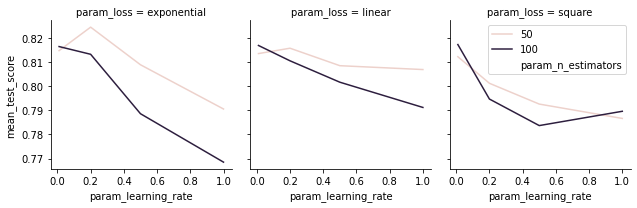

In [64]:
fig_adb_reg = sns.FacetGrid(df_grid_search_adb_reg, col="param_loss")
fig_adb_reg.map(sns.lineplot, "param_learning_rate", "mean_test_score", "param_n_estimators")
plt.plot([], [], ' ', label="param_n_estimators")
plt.legend()
plt.show()

In [65]:
grid_search_adb_reg.score(X_test, y_test)

0.6911967395958438

RMSE: 0.5254206505315876


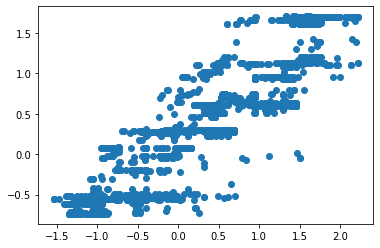

In [66]:
plot_test(grid_search_adb_reg, X_test, y_test)

## Gradient Boosting Regressor 

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

In [68]:
param_grid_gb_reg = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [5, 7, 10]
}

In [69]:
grid_search_gb_reg = GridSearchCV(GradientBoostingRegressor(), param_grid_gb_reg, cv=5, n_jobs=-1)

In [70]:
grid_search_gb_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'n_estimators': [50, 100, 200, 500]})

In [71]:
grid_search_gb_reg.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [72]:
grid_search_gb_reg.cv_results_

{'mean_fit_time': array([ 1.19009109,  2.44949841,  5.08539953, 13.29389892,  1.6469996 ,
         3.69379988,  7.23299961, 17.63239956,  2.33299956,  4.74119883,
         9.68859944, 20.49749913]),
 'std_fit_time': array([0.00675227, 0.03167134, 0.08051179, 0.16728213, 0.03231561,
        0.18332025, 0.14310686, 0.1878336 , 0.11003582, 0.11201754,
        0.16579724, 0.76252836]),
 'mean_score_time': array([0.00330009, 0.00420055, 0.00669951, 0.01870027, 0.00410023,
        0.00980244, 0.0095006 , 0.01930017, 0.00749984, 0.00980005,
        0.01509991, 0.02379994]),
 'std_score_time': array([8.72121796e-04, 2.44913034e-04, 3.99971293e-04, 5.62682854e-03,
        1.99844131e-04, 6.38309111e-03, 5.76164530e-07, 1.86011653e-03,
        6.32485129e-04, 2.44775595e-04, 7.34916978e-04, 3.99673272e-04]),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 7, 7, 7, 7, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, 

In [73]:
df_grid_search_gb_reg = pd.DataFrame(grid_search_gb_reg.cv_results_)
df_grid_search_gb_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.190091,0.006752,0.003300,0.000872,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.899851,0.896779,0.890230,0.901986,0.903488,0.898467,0.004695,12
1,2.449498,0.031671,0.004201,0.000245,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.908112,0.903585,0.898842,0.907140,0.910645,0.905665,0.004095,11
2,5.085400,0.080512,0.006700,0.000400,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.916871,0.911134,0.908548,0.913973,0.921110,0.914327,0.004386,10
3,13.293899,0.167282,0.018700,0.005627,5,500,"{'max_depth': 5, 'n_estimators': 500}",0.924968,0.918695,0.918991,0.921710,0.929397,0.922752,0.004019,7
4,1.647000,0.032316,0.004100,0.000200,7,50,"{'max_depth': 7, 'n_estimators': 50}",0.918687,0.912903,0.912440,0.915465,0.923885,0.916676,0.004235,9


In [74]:
df_grid_search_gb_reg.sort_values(["param_max_depth", "param_n_estimators", "mean_test_score"], inplace=True)

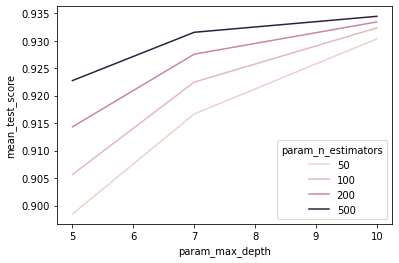

In [75]:
sns.lineplot(x="param_max_depth", y="mean_test_score", hue="param_n_estimators", data=df_grid_search_gb_reg);

In [76]:
grid_search_gb_reg.score(X_test, y_test)

0.7688409040553466

RMSE: 0.4545918997851012


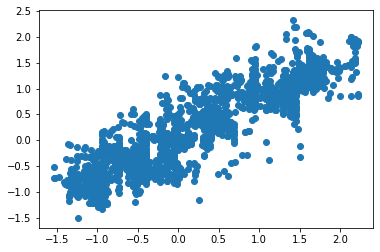

In [77]:
plot_test(grid_search_gb_reg, X_test, y_test)

## XGBoost Regressor

In [78]:
from xgboost import XGBRegressor

In [79]:
param_grid_xgb_reg = {
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

In [80]:
grid_search_xgb_reg = GridSearchCV(XGBRegressor(), param_grid_xgb_reg, cv=5, n_jobs=-1)

In [81]:
grid_search_xgb_reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [82]:
grid_search_xgb_reg.best_params_

{'max_depth': 5, 'min_child_weight': 5, 'subsample': 1.0}

In [83]:
grid_search_xgb_reg.cv_results_

{'mean_fit_time': array([0.96949921, 1.00789957, 0.90150003, 0.84789963, 0.84050045,
        0.8548996 , 0.88379931, 0.90700006, 0.85840054, 1.14569969,
        1.13419895, 1.10969911, 1.15620041, 1.16529994, 1.12539883,
        1.07769966, 1.17529993, 1.19399986, 1.58389974, 1.47779989,
        1.42729983, 1.47718806, 1.53349977, 1.48399787, 1.35649924,
        1.25549917, 0.90749998]),
 'std_fit_time': array([0.054112  , 0.05688095, 0.04543876, 0.01883455, 0.01132667,
        0.01263483, 0.01335824, 0.00301593, 0.01207645, 0.0389162 ,
        0.02024528, 0.0453336 , 0.04891677, 0.02760001, 0.03861992,
        0.02975352, 0.02546107, 0.01087164, 0.0081574 , 0.04758695,
        0.02013623, 0.03307346, 0.03389212, 0.04882406, 0.02086852,
        0.08129199, 0.15063263]),
 'mean_score_time': array([0.0041007 , 0.00399995, 0.0030005 , 0.00350032, 0.00359998,
        0.0031004 , 0.00550051, 0.00349998, 0.00450015, 0.00320091,
        0.00650048, 0.00320005, 0.00650029, 0.00800014, 0.003800

In [84]:
df_grid_search_xgb_reg = pd.DataFrame(grid_search_xgb_reg.cv_results_)
df_grid_search_xgb_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.969499,0.054112,0.004101,0.001200,3,1,0.6,"{'max_depth': 3, 'min_child_weight': 1, 'subsa...",0.896140,0.896279,0.891209,0.895020,0.902319,0.896193,0.003571,26
1,1.007900,0.056881,0.004000,0.001304,3,1,0.8,"{'max_depth': 3, 'min_child_weight': 1, 'subsa...",0.898766,0.896295,0.890382,0.900699,0.903146,0.897858,0.004363,19
2,0.901500,0.045439,0.003000,0.000448,3,1,1.0,"{'max_depth': 3, 'min_child_weight': 1, 'subsa...",0.899948,0.894789,0.888521,0.899941,0.900734,0.896787,0.004644,25
3,0.847900,0.018835,0.003500,0.000448,3,5,0.6,"{'max_depth': 3, 'min_child_weight': 5, 'subsa...",0.896402,0.897204,0.889157,0.896777,0.904630,0.896834,0.004900,24
4,0.840500,0.011327,0.003600,0.000583,3,5,0.8,"{'max_depth': 3, 'min_child_weight': 5, 'subsa...",0.898950,0.895122,0.889911,0.898914,0.904863,0.897552,0.004930,21


In [85]:
df_grid_search_xgb_reg.sort_values(["param_min_child_weight", "param_subsample", "param_max_depth", "mean_test_score"], inplace=True)

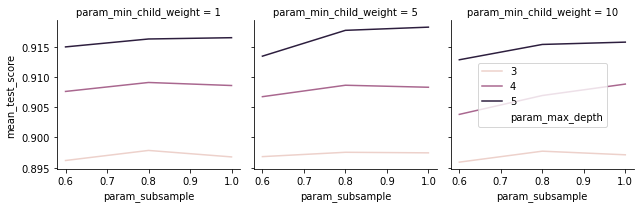

In [86]:
fig_xgb_reg = sns.FacetGrid(df_grid_search_xgb_reg, col="param_min_child_weight")
fig_xgb_reg.map(sns.lineplot, "param_subsample", "mean_test_score", "param_max_depth")
plt.plot([], [], ' ', label="param_max_depth")
plt.legend()
plt.show()

In [87]:
grid_search_xgb_reg.score(X_test, y_test)

0.8103144834477073

RMSE: 0.41179710113879536


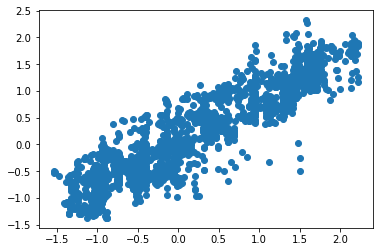

In [88]:
plot_test(grid_search_xgb_reg, X_test, y_test)